In [7]:
import numpy as np


class TrafficEnvironment:
    def __init__(self):
        self.state = np.random.randint(0, 10, size=4)  # [North, South, East, West]
        self.current_light = 0  # 0: Green for NS, 1: Green for EW

    def step(self, action):
        if action == 1:
            self.current_light = 1 - self.current_light  # Switch traffic lights

        if self.current_light == 0:  # NS Green, EW Red
            passed = min(self.state[0], np.random.randint(1, 5)) + min(self.state[1], np.random.randint(1, 5))
            self.state[0] = max(0, self.state[0] - passed)
            self.state[1] = max(0, self.state[1] - passed)
        else:  # EW Green, NS Red
            passed = min(self.state[2], np.random.randint(1, 5)) + min(self.state[3], np.random.randint(1, 5))
            self.state[2] = max(0, self.state[2] - passed)
            self.state[3] = max(0, self.state[3] - passed)

        new_cars = np.random.randint(0, 3, size=4)
        self.state += new_cars
        reward = passed

        return self.state, reward

    def reset(self):
        self.state = np.random.randint(0, 10, size=4)
        self.current_light = 0
        return self.state


# Test the environment
env = TrafficEnvironment()
state = env.reset()

print("🚦 Initial Traffic Light Simulation 🚦")
print("State Format: [Cars North, Cars South, Cars East, Cars West]")
print("Actions: 0 = Keep Current Light, 1 = Switch Light")
print(f"Initial state: {state} (NS Green, EW Red)")

for i in range(10):
    action = np.random.choice([0, 1])
    next_state, reward = env.step(action)

    light_status = "NS Green, EW Red" if env.current_light == 0 else "EW Green, NS Red"
    print(f"Step {i + 1}:")
    print(f"  ➡ Action Taken: {action} ({'Switch' if action == 1 else 'Keep'})")
    print(f"  🚥 Light Status: {light_status}")
    print(f"  🏎 Cars State: {next_state}")
    print(f"  🎯 Reward (Cars Passed): {reward}")
    print("-" * 40)

🚦 Initial Traffic Light Simulation 🚦
State Format: [Cars North, Cars South, Cars East, Cars West]
Actions: 0 = Keep Current Light, 1 = Switch Light
Initial state: [3 3 1 6] (NS Green, EW Red)
Step 1:
  ➡ Action Taken: 0 (Keep)
  🚥 Light Status: NS Green, EW Red
  🏎 Cars State: [0 2 2 8]
  🎯 Reward (Cars Passed): 6
----------------------------------------
Step 2:
  ➡ Action Taken: 0 (Keep)
  🚥 Light Status: NS Green, EW Red
  🏎 Cars State: [ 0  0  3 10]
  🎯 Reward (Cars Passed): 2
----------------------------------------
Step 3:
  ➡ Action Taken: 1 (Switch)
  🚥 Light Status: EW Green, NS Red
  🏎 Cars State: [0 1 0 8]
  🎯 Reward (Cars Passed): 3
----------------------------------------
Step 4:
  ➡ Action Taken: 0 (Keep)
  🚥 Light Status: EW Green, NS Red
  🏎 Cars State: [0 1 0 8]
  🎯 Reward (Cars Passed): 1
----------------------------------------
Step 5:
  ➡ Action Taken: 1 (Switch)
  🚥 Light Status: NS Green, EW Red
  🏎 Cars State: [ 1  0  2 10]
  🎯 Reward (Cars Passed): 1
------------

# Exercice2:

[[[[[[1.71000000e-02 6.00218984e-02]
     [4.31123184e-01 0.00000000e+00]]

    [[0.00000000e+00 0.00000000e+00]
     [4.06444791e-01 0.00000000e+00]]

    [[5.23317344e-01 0.00000000e+00]
     [2.98374932e-01 0.00000000e+00]]

    ...

    [[0.00000000e+00 0.00000000e+00]
     [0.00000000e+00 0.00000000e+00]]

    [[0.00000000e+00 0.00000000e+00]
     [0.00000000e+00 0.00000000e+00]]

    [[0.00000000e+00 0.00000000e+00]
     [3.00000000e-01 0.00000000e+00]]]


   [[[4.16914216e-01 1.34522243e-01]
     [1.00000000e-01 0.00000000e+00]]

    [[4.79639297e-01 2.99187086e-01]
     [4.13830751e-01 0.00000000e+00]]

    [[1.40805817e+00 0.00000000e+00]
     [5.08647626e-01 0.00000000e+00]]

    ...

    [[1.64952961e-01 1.00300000e+00]
     [0.00000000e+00 0.00000000e+00]]

    [[2.18266316e-01 0.00000000e+00]
     [0.00000000e+00 0.00000000e+00]]

    [[1.36693913e-01 0.00000000e+00]
     [0.00000000e+00 0.00000000e+00]]]


   [[[3.93551155e-01 0.00000000e+00]
     [1.08178208e+00 0.000000

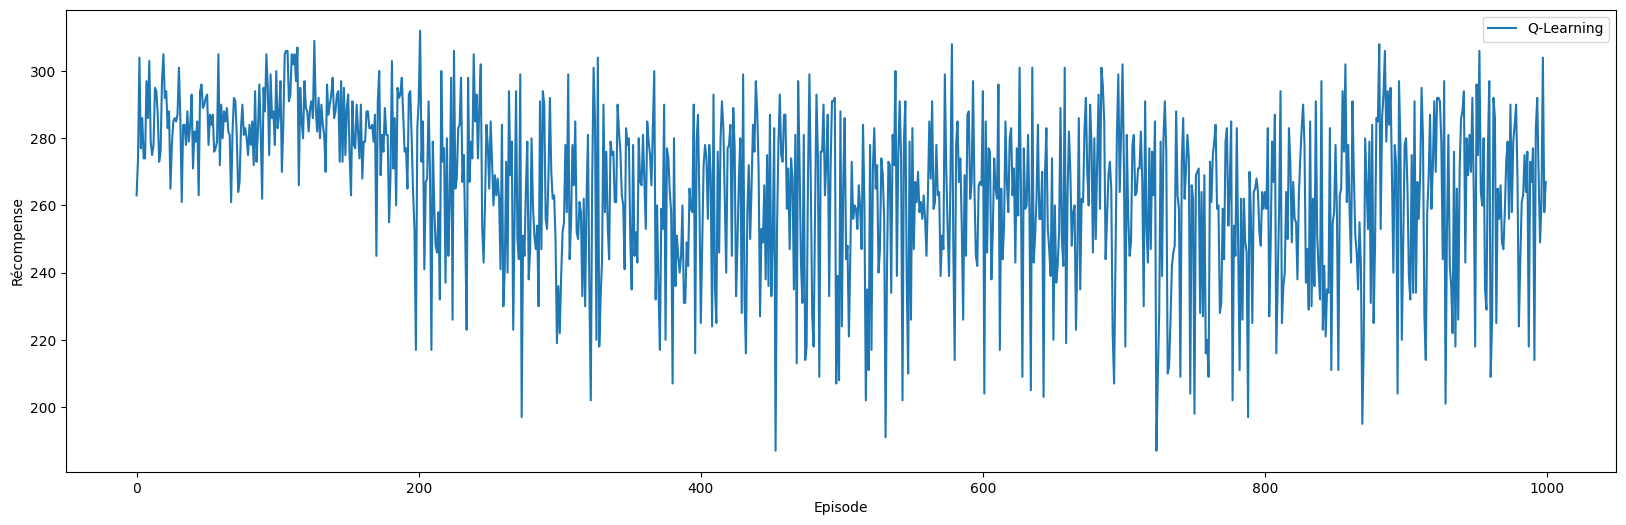

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Supposons que l'on représente l'état par (N, S, E, W, Light)
# N, S, E, W : 0..9 (10 possibilités chacun)
# Light : 0 ou 1 (2 possibilités)
# => Taille de la Q-Table : 10 x 10 x 10 x 10 x 2 x 2 (états x actions)

class QLearningAgent:
    def __init__(self, alpha=0.1, gamma=0.9, epsilon=0.1):
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        # Q-Table : Q[N, S, E, W, Light, Action]
        self.Q = np.zeros((10, 10, 10, 10, 2, 2))

    def discretize_state(self, state, current_light):
        # state = [N, S, E, W], values in [0..9] (si on borne à 9 max)
        # current_light in {0,1}
        # On s'assure de ne pas dépasser 9
        N = min(state[0], 9)
        S = min(state[1], 9)
        E = min(state[2], 9)
        W = min(state[3], 9)
        return (N, S, E, W, current_light)

    def choose_action(self, state):
        # epsilon-greedy
        if np.random.rand() < self.epsilon:
            return np.random.randint(2)  # 0 ou 1
        else:
            return np.argmax(self.Q[state])

    def update(self, old_state, action, reward, new_state):
        # Q-Learning update
        old_value = self.Q[old_state][action]
        best_next_action = np.argmax(self.Q[new_state])
        td_target = reward + self.gamma * self.Q[new_state][best_next_action]
        self.Q[old_state][action] = old_value + self.alpha * (td_target - old_value)

def train_qlearning(env, episodes=1000, alpha=0.1, gamma=0.9, epsilon=0.1):
    agent = QLearningAgent(alpha, gamma, epsilon)
    rewards_per_episode = []

    for ep in range(episodes):
        state = env.reset()
        current_light = env.current_light
        discrete_state = agent.discretize_state(state, current_light)
        total_reward = 0

        # On peut fixer un nombre max de steps par épisode
        for t in range(100):
            action = agent.choose_action(discrete_state)
            next_state, reward = env.step(action)
            next_light = env.current_light

            new_discrete_state = agent.discretize_state(next_state, next_light)

            agent.update(discrete_state, action, reward, new_discrete_state)

            discrete_state = new_discrete_state
            total_reward += reward

        rewards_per_episode.append(total_reward)

    return agent, rewards_per_episode

# Exemple d’utilisation :

env = TrafficEnvironment()
q_agent, q_learning_rewards = train_qlearning(env, episodes=1000)
# Affichage de la Q-table finale :
print(q_agent.Q)

# Tracé des récompenses
plt.figure(figsize=(20, 6))
plt.plot(q_learning_rewards, label="Q-Learning")
plt.xlabel("Episode")
plt.ylabel("Récompense")
plt.legend()
plt.show()


# Exercice 3:

[[[[[[1.16463949e+00 0.00000000e+00]
     [0.00000000e+00 3.01467918e-01]]

    [[1.67252013e+00 0.00000000e+00]
     [0.00000000e+00 0.00000000e+00]]

    [[2.44266106e+00 9.50847630e-01]
     [9.40907139e-01 0.00000000e+00]]

    ...

    [[0.00000000e+00 3.80000000e-01]
     [0.00000000e+00 0.00000000e+00]]

    [[0.00000000e+00 0.00000000e+00]
     [0.00000000e+00 0.00000000e+00]]

    [[0.00000000e+00 0.00000000e+00]
     [0.00000000e+00 0.00000000e+00]]]


   [[[9.47384174e-01 0.00000000e+00]
     [4.80115239e-01 0.00000000e+00]]

    [[2.65951026e+00 0.00000000e+00]
     [1.67137505e+00 0.00000000e+00]]

    [[4.36750798e+00 3.00000000e-01]
     [2.64125105e-01 0.00000000e+00]]

    ...

    [[3.00780000e-02 3.39659174e-01]
     [0.00000000e+00 0.00000000e+00]]

    [[2.24666758e-01 0.00000000e+00]
     [0.00000000e+00 0.00000000e+00]]

    [[2.39078701e-01 0.00000000e+00]
     [0.00000000e+00 0.00000000e+00]]]


   [[[1.59585422e+00 0.00000000e+00]
     [2.58158361e-01 1.325195

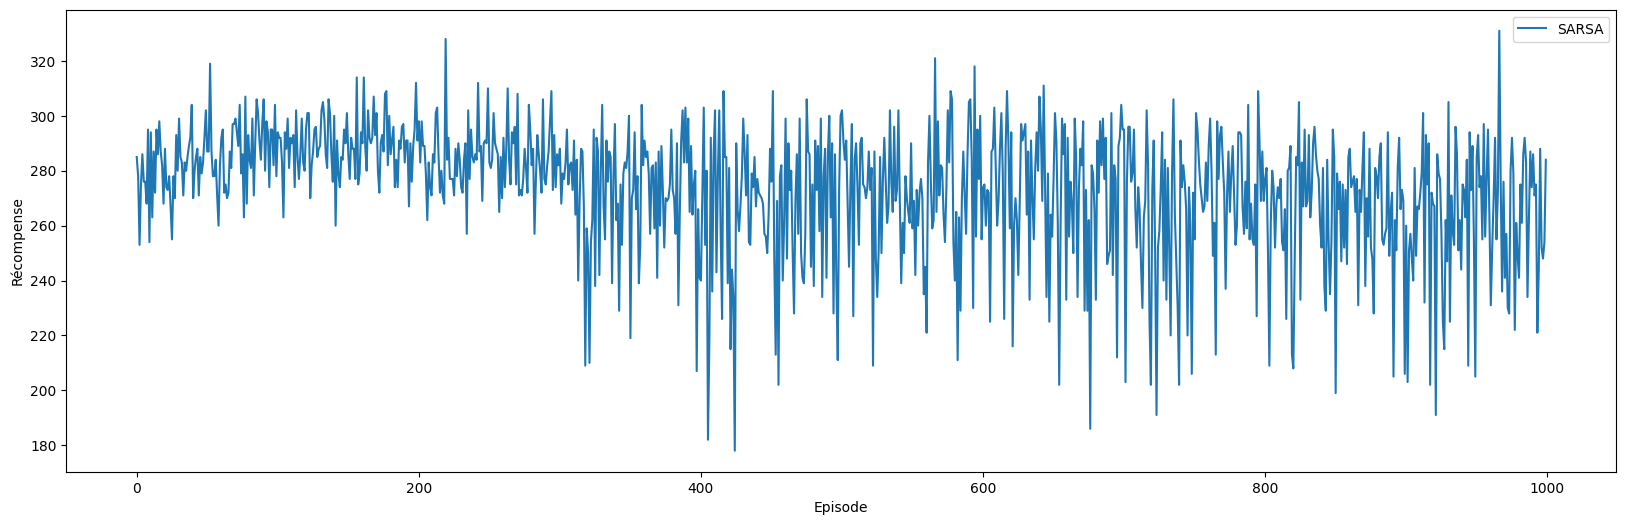

In [9]:
import numpy as np
import matplotlib.pyplot as plt

class SARSAAgent:
    def __init__(self, alpha=0.1, gamma=0.9, epsilon=0.1):
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.Q = np.zeros((10, 10, 10, 10, 2, 2))

    def discretize_state(self, state, current_light):
        N = min(state[0], 9)
        S = min(state[1], 9)
        E = min(state[2], 9)
        W = min(state[3], 9)
        return (N, S, E, W, current_light)

    def choose_action(self, state):
        if np.random.rand() < self.epsilon:
            return np.random.randint(2)
        else:
            return np.argmax(self.Q[state])

    def update(self, old_state, old_action, reward, new_state, new_action):
        old_value = self.Q[old_state][old_action]
        td_target = reward + self.gamma * self.Q[new_state][new_action]
        self.Q[old_state][old_action] = old_value + self.alpha * (td_target - old_value)

def train_sarsa(env, episodes=1000, alpha=0.1, gamma=0.9, epsilon=0.1):
    agent = SARSAAgent(alpha, gamma, epsilon)
    rewards_per_episode = []

    for ep in range(episodes):
        state = env.reset()
        current_light = env.current_light
        discrete_state = agent.discretize_state(state, current_light)
        action = agent.choose_action(discrete_state)

        total_reward = 0

        for t in range(100):
            next_state, reward = env.step(action)
            next_light = env.current_light
            new_discrete_state = agent.discretize_state(next_state, next_light)

            # Choisir l'action suivante a'
            next_action = agent.choose_action(new_discrete_state)

            # Mise à jour SARSA
            agent.update(discrete_state, action, reward, new_discrete_state, next_action)

            discrete_state = new_discrete_state
            action = next_action
            total_reward += reward

        rewards_per_episode.append(total_reward)

    return agent, rewards_per_episode

# Exemple d’utilisation :
env = TrafficEnvironment()
sarsa_agent, sarsa_rewards = train_sarsa(env, episodes=1000)
print(sarsa_agent.Q)

# Tracé
plt.figure(figsize=(20, 6))
plt.plot(sarsa_rewards, label="SARSA")
plt.xlabel("Episode")
plt.ylabel("Récompense")
plt.legend()
plt.show()


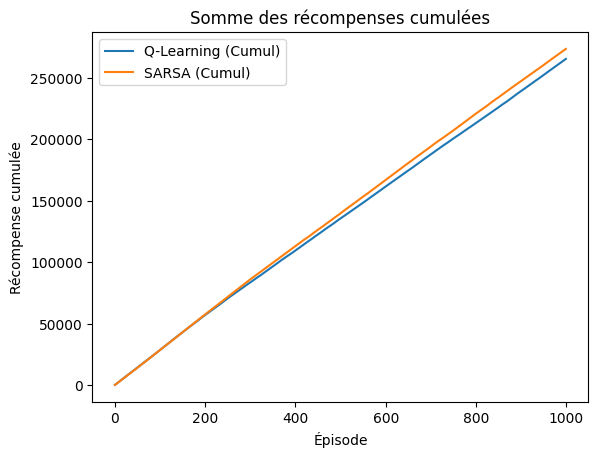

In [10]:
cumulative_q = np.cumsum(q_learning_rewards)
cumulative_sarsa = np.cumsum(sarsa_rewards)

plt.plot(cumulative_q, label="Q-Learning (Cumul)")
plt.plot(cumulative_sarsa, label="SARSA (Cumul)")
plt.xlabel("Épisode")
plt.ylabel("Récompense cumulée")
plt.title("Somme des récompenses cumulées")
plt.legend()
plt.show()


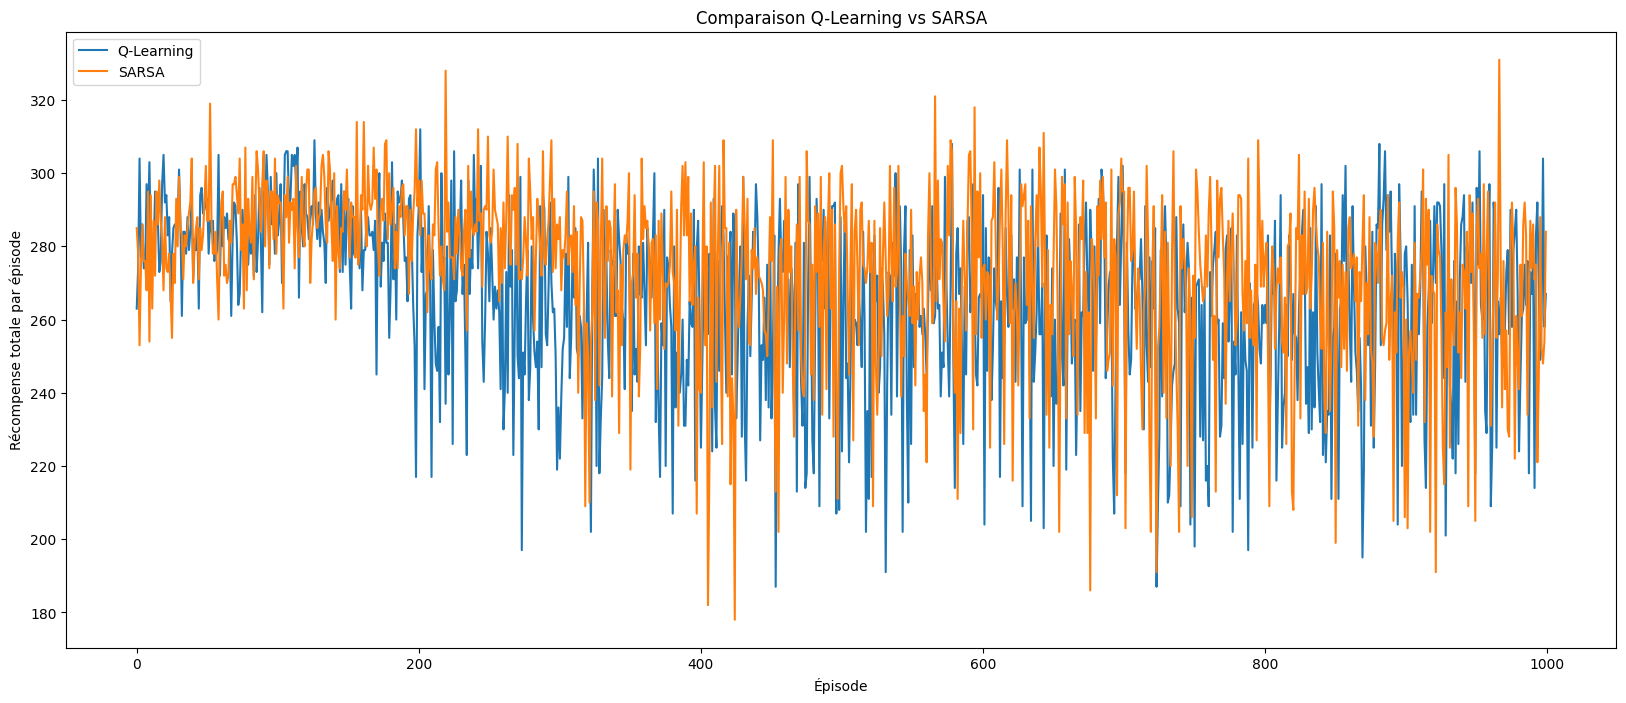

In [11]:
# Supposons que vous avez déjà récupéré les historiques de récompenses :
# q_learning_rewards et sarsa_rewards

import matplotlib.pyplot as plt
plt.figure(figsize=(20, 8))

plt.plot(q_learning_rewards, label="Q-Learning")
plt.plot(sarsa_rewards, label="SARSA")
plt.xlabel("Épisode")
plt.ylabel("Récompense totale par épisode")
plt.title("Comparaison Q-Learning vs SARSA")
plt.legend()
plt.show()
